In [16]:
import pandas as pd
from sklearn import preprocessing
from numpy import *
import math

In [12]:
df1 = pd.read_csv('./table1.txt', sep='\t', 
                  header=None, 
                 # dtype=np.float64
                 )
df2 = pd.read_csv('./table2.txt', 
                  sep='\t', 
                  header=None
                 )

In [31]:
df1 = df1.fillna(0)
df2 = df2.fillna(0)

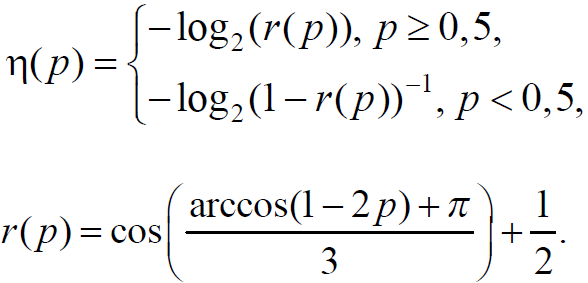

In [52]:
def rp(p):
    return cos((arccos(1 - 2 * p) + pi) / 3) + 0.5

def np(p):
    if (p < 0.5): 
        return -1/(log(1 - rp(p))/log(2))
    else:
        return -(log(rp(p))/log(2))

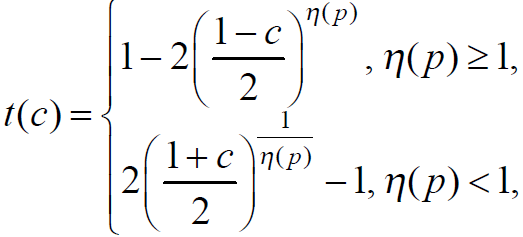

In [41]:
def Tc(c, i, j, np):
    if (np[i][j] < 1):
        return 2 * pow(((1 + c) / 2), 1/ np[i][j]) - 1
    else:
        return 1 - 2 * pow(((1 - c) / 2), np[i][j]);

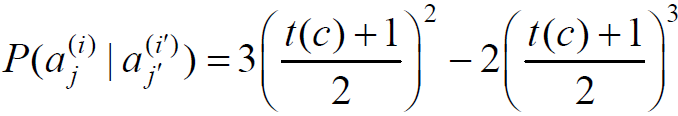

In [20]:
def Paa(tc):
    return (3 * pow((tc + 1) / 2, 2) - pow(tc + 1, 3) / 4)

### Part1

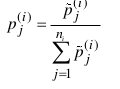

In [10]:
df1_p_ = df1.div(df1.sum(axis=0), axis=1)

In [59]:
df1_np = df1_p_.applymap(lambda p: np(p))
df1_np

/home/denys/classifieds/venv/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


,0,1,2,3
0,0.327434,0.482720,0.606200,0.630930
1,0.657950,1.000000,1.039004,1.191152
2,1.039004,0.665480,0.555503,0.489574
3,0.504802,0.382713,0.327434,0.000000


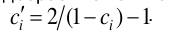

In [32]:
# c-calculate
df2_c_ = df2.applymap(lambda c: (2/(1-c))-1)
df2_c_

,0,1,2,3,4,5,6,7,8,9,10,11
0,3.000000,1.000000,0.538462,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
1,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
2,0.333333,1.857143,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
3,0.052632,0.333333,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
4,1.500000,1.000000,0.818182,0.666667,2.333333,1.000000,0.666667,0.176471,1.000000,1.0,1.0,1.000000
5,1.000000,1.000000,1.000000,1.000000,1.500000,1.500000,1.000000,0.428571,1.000000,1.0,1.0,1.000000
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
7,0.428571,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.857143,1.000000,1.0,1.0,1.000000
8,0.333333,1.000000,1.857143,3.000000,0.538462,0.818182,1.857143,4.000000,0.666667,1.0,1.0,1.500000
9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,1.000000,1.0,1.0,1.000000


In [29]:
c_calculate = ones((4,4,4,4))

In [33]:
# 2 1
c_calculate[1][0][0][0] = 3;
c_calculate[1][0][0][2] = 0.538462;
c_calculate[1][0][0][3] = 0.25;

# 2 2
c_calculate[1][1][0][1] = 3;

# 2 3

c_calculate[1][2][0][0] = 0.333;
c_calculate[1][2][0][1] = 1.857;
c_calculate[1][2][0][2] = 3;

# 2 4

c_calculate[1][3][0][0] = 0.052;
c_calculate[1][3][0][1] = 0.333;
c_calculate[1][3][0][2] = 0.667;


# 3 1

c_calculate[2][0][0][0] = 1.5;
c_calculate[2][0][0][2] = 0.81
c_calculate[2][0][0][3] = 0.667;
c_calculate[2][0][1][0] = 2.33;
c_calculate[2][0][1][2] = 0.667;
c_calculate[2][0][1][3] = 0.17;


# 3 2

c_calculate[2][1][1][0] = 1.5;
c_calculate[2][1][1][1] = 1.5;
c_calculate[2][1][1][3] = 0.43;

# 3 3

# 3 4

c_calculate[2][3][0][0] = 0.428571 
c_calculate[2][3][0][2] = 0.666667
c_calculate[2][3][1][3] = 1.86;

# 4 1
c_calculate[3][0][0][0] = 0.33;
c_calculate[3][0][0][2] = 1.85;
c_calculate[3][0][0][3] = 3;

c_calculate[3][0][1][0] = 0.54;
c_calculate[3][0][1][1] = 0.81;
c_calculate[3][0][1][2] = 1.86;
c_calculate[3][0][1][3] = 4;

c_calculate[3][0][2][0] = 0.667;
c_calculate[3][0][2][3] = 1.5;

# 4 2
c_calculate[3][1][1][3] = 1.5;

# 4 3
c_calculate[3][2][0][0] = 3;
c_calculate[3][2][0][2] = 0.53;
c_calculate[3][2][0][3] = 0.33;

c_calculate[3][2][1][0] = 1.85;
c_calculate[3][2][1][1] = 1.2;
c_calculate[3][2][1][2] = 0.33;
c_calculate[3][2][1][3] = 0.25;

c_calculate[3][2][2][0] = 1.5;
c_calculate[3][2][2][3] = 0.66;

# 4 4

In [34]:
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,4):
            for l in range(0,4):
                        c_calculate[i][j][k][l] = c_calculate[k][l][i][j];

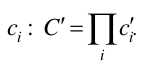

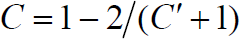


In [35]:
c_matrix = zeros((4,4,4,4,4,4,4))
p_matrix = zeros((4,4,4,4,4,4,4))

In [56]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                for i5 in range(0,4):
                    for i6 in range(0,4):
                        for i7 in range(0,4):
                            if (i1 == 0):
                                c_matrix[i1][i2][i3][i4][i5][i6][i7] = c_calculate[i1][i2][1][i3] * c_calculate[i1][i2][2][i4] * c_calculate[i1][i2][3][i5]
                            if (i1 == 1):
                                c_matrix[i1][i2][i3][i4][i5][i6][i7] = c_calculate[i1][i2][0][i3] * c_calculate[i1][i2][2][i4] * c_calculate[i1][i2][3][i5] 
                            if (i1 == 2):
                                c_matrix[i1][i2][i3][i4][i5][i6][i7] = c_calculate[i1][i2][0][i3] * c_calculate[i1][i2][1][i4] * c_calculate[i1][i2][3][i5] 
                            if (i1 == 3):
                                c_matrix[i1][i2][i3][i4][i5][i6][i7] = c_calculate[i1][i2][0][i3] * c_calculate[i1][i2][1][i4] * c_calculate[i1][i2][2][i5] 

                            c_matrix[i1][i2][i3][i4][i5][i6][i7] = 1 - 2.0 / (c_matrix[i1][i2][i3][i4][i5][i6][i7] + 1)
                            tc = Tc(c_matrix[i1][i2][i3][i4][i5][i6][i7], i2, i1, df1_np.as_matrix())
                            p_matrix[i1][i2][i3][i4][i5][i6][i7] = Paa(tc)



/home/denys/classifieds/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


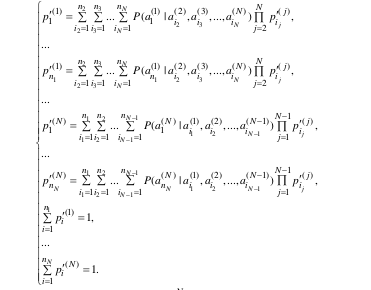

In [62]:
probability_x1 = zeros((4,4))
probability_x2 = zeros((4,4))

In [65]:
for n in range(0,10):
    for i in range(0,4):
        for j in range(0,4):
            for i3 in range(0,4):
                for i4 in range(0,4):
                    for i5 in range(0,4):
                        for i6 in range(0,4):
                            for i7 in range(0,4):
                                if (i == 0):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5][i6][i7] * df1_p_[i3][1] * df1_p_[i4][2] * df1_p_[i5][3] 
                                if (i == 1):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5][i6][i7] * df1_p_[i3][0] * df1_p_[i4][2] * df1_p_[i5][3] 
                                if (i == 2):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5][i6][i7] * df1_p_[i3][0] * df1_p_[i4][1] * df1_p_[i5][3] 
                                if (i == 3):
                                    probability_x1[i][j] = probability_x1[i][j] + p_matrix[i][j][i3][i4][i5][i6][i7] * df1_p_[i3][0] * df1_p_[i4][1] * df1_p_[i5][2] 
                              
    probability_x1[3][3] = 0;
    for i in range(0,4):
        sum = 0;
        for j in range(0,4):
            sum = sum + probability_x1[i][j];

        for j in range(0,4):
            probability_x2[j][i] = probability_x1[i][j] / sum;
            probability_x1[i][j] = 0;

In [66]:
probability_x2

array([[ 0.04876585,  0.10081278,  0.13437577,  0.44816711],
       [ 0.29436176,  0.43366648,  0.53606768,  0.49121163],
       [ 0.43348737,  0.37303433,  0.2188085 ,  0.06062126],
       [ 0.22338502,  0.09248642,  0.11074805,  0.        ]])

### Part 2 

In [78]:
df1 = pd.DataFrame(ones((4,4))/4)
df1_np = df1.applymap(lambda p: np(p))
df1_np

,0,1,2,3
0,0.619003,0.619003,0.619003,0.619003
1,0.619003,0.619003,0.619003,0.619003
2,0.619003,0.619003,0.619003,0.619003
3,0.619003,0.619003,0.619003,0.619003


In [70]:
second_level = [
            [
                    [[0.2, 0.3, 0.5, -0.5], [0.3, 0.5, 0, -0.5], [0.2, 0.7, 0.4, -0.5], [0.5, 0, 0, 0]],
                    [[0, 0, 0, 0], [0.3, 0, 0.2, 0], [0.3, 0.3, 0.2, -0.3], [0.3, 0.2, 0, 0]],
                    [[-0.2, -0.3, -0.2, 0.2], [-0.3, -0.4, 0, 0], [0, 0.2, -0.2, 0], [0, 0.3, 0, 0]],
                    [[-0.2, -0.5, -0.8, 0.5], [-0.5, -0.7, 0, 0.2], [-0.2, 0, -0.5, 0.2], [0, 0.5, 0, -0.1]]
            ],
            [
                    [[0, 0, -0.2, 0], [-0.1, -0.2, 0, 0], [-0.1, -0.1, -0.1, 0], [-0.1, -0.3, 0, 0]],
                    [[0, 0, -0.1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, -0.2, 0, 0]],
                    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1]]
            ],
            [
                    [[0, 0, 0.2, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0.2, 0, 0]],
                    [[0, 0, 0.2, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0.1, 0, 0]],
                    [[0, -0.2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[0, -0.3, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
            ],
            [
                    [[0.3, 0, 0.5, -0.2], [0.4, 0.5, 0, 0], [0.2, 0.8, 0.5, 0], [0.5, 0.7, 0, 0]],
                    [[0, 0, 0, 0], [0.2, 0.2, 0, 0], [0.4, 0.6, 0, 0], [0.3, 0.3, 0, 0]],
                    [[0, 0, -0.5, 0.2], [0, 0, 0, 0], [0, 0, -0.1, 0], [0, -0.5, 0, 0]],
                    [[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1]]
            ],
            [
                    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1]]
            ],
            [
                    [[0, 0.2, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[0.2, -0.2, 0.5, 0.2], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0.3, 0]],
                    [[0.8, -1, 0.8, 0.7], [-0.1, -0.3, 0, 0], [-0.1, -0.2, -0.3, 0], [0, 0, 0.7, 0]],
                    [[-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1], [-1, -1, -1, -1]]
            ]


    ]

In [79]:
c_calculate2 = zeros((6,4,4,4))

In [81]:
for i1 in range(0,6):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                c_calculate2[i1][i2][i3][i4] = 2.0 / (1 - second_level[i1][i2][i3][i4]) - 1;

In [82]:
c_matrix2 = zeros((4,4,4,3,4,3,3,3))
p_matrix2 = zeros((4,4,4,3,4,3,3,3))

In [85]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,3):
                for i5 in range(0,4):
                    for i6 in range(0,3):
                        for i7 in range(0,3):
                            for i8 in range(0,3):
                                c_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] = c_calculate2[0][i3][i1][i2] * c_calculate2[1][i4][i1][i2] * c_calculate2[2][i5][i1][i2] * c_calculate2[3][i6][i1][i2] * c_calculate2[4][i7][i1][i2] * c_calculate2[5][i8][i1][i2];
                                c_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] = 1 - 2.0 / (c_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] + 1);
                                tc = Tc(c_matrix2[i1][i2][i3][i4][i5][i6][i7][i8], i1, i2, df1_np.as_matrix());
                                p_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] = Paa(tc);
                                    

In [87]:
probability2 = zeros((4,4))

In [89]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,3):
                for i5 in range(0,4):
                    for i6 in range(0,3):
                        for i7 in range(0,3):
                            for i8 in range(0,3):
                                probability2[i1][i2] = probability2[i1][i2] + p_matrix2[i1][i2][i3][i4][i5][i6][i7][i8] * probability_x2[i3][0] * probability_x2[i4][1] * probability_x2[i5][2] * probability_x2[i6][3]


for i in range(0,4):
    sum = 0;
    for j in range(0,4):
        sum = sum + probability2[i][j];
    for j in range(0,4):
        probability2[i][j] = probability2[i][j] / sum;

In [90]:
probability2

array([[ 0.30127129,  0.04969142,  0.3304844 ,  0.3185529 ],
       [ 0.3014592 ,  0.20890652,  0.25418162,  0.23545266],
       [ 0.26228702,  0.45387865,  0.16364567,  0.12018867],
       [ 0.29314982,  0.35116373,  0.24729065,  0.1083958 ]])

### Part 3

In [111]:
third_level = [
            [
                    [[0, 0, 0, 0], [0.5, 0.5, 0, -0.5], [0.3, 0.3, 0.3, 0], [0, 0, -0.5, 0]],
                    [[0, 0, 0, 0], [0, 0, 0, 0],        [0.3, 0.3, 0.3, 0], [0, 0, -0.5, 0]],
                    [[0, 0, 0, 0], [-0.1, -0.2, 0, 0.2], [-0.2, 0.7, 0.2, -0.5], [0, 0, 0.8, 0]],
                    [[0, 0, 0, 0], [0, 0, 0.2, 0], [-0.3, -0.5, -0.6, 0.3], [0, 0, 0, 0]]
            ],
            [
                    [[0.5, 0, -0.1, 0], [0, 0, 0, 0], [0.5, 0.2, 0.4, -0.6], [-0.5, 0, 0, 0.3]],
                    [[0.5, 0, -0.2, 0], [0, 0, 0, 0], [0.5, 0.7, 0.5, -0.8], [-0.5, 0, 0, 0.3]],
                    [[0, 0, 0, 0.2],    [0, 0, 0, 0], [0, -0.3, -0.5, 0], [0, 0, 0, 0]],
                    [[-0.5, 0, 0.2, 0], [0, 0, 0, 0], [-0.2, -0.8, -0.8, 0.4], [0.3, 0, 0, -0.2]]
            ],
            [
                    [[0.3, 0.3, -0.2, -0.3], [0, 0, 0, 0], [0, 0, 0, 0], [-0.5, 0, 0, 0.3]],
                    [[0.3, 0.3, 0.7, -0.5], [0, 0, 0, 0], [0, 0, 0, 0], [-0.2, 0, 0.2, 0.3]],
                    [[0.3, 0.3, 0.2, -0.6], [0, 0, 0, 0], [0, 0, 0, 0], [-0.5, 0, 0, 0.3]],
                    [[0, 0, -0.5, 0.3], [0, 0, 0, 0], [0, 0, 0, 0], [0.5, 0, -0.1, -0.5]]
            ],
            [
                    [[0, 0, 0, 0], [-0.5, -0.5, 0, 0.3], [-0.5, -0.2, -0.5, 0.5], [0, 0, 0, 0]],
                    [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]],
                    [[-0.5, -0.5, 0.8, 0], [0, 0, 0, 0], [0, 0.2, 0, -0.1], [0, 0, 0, 0]],
                    [[0, 0, 0, 0], [0.3, 0.3, 0, -0.2], [0.3, 0.3, 0.3, -0.5], [0, 0, 0, 0]]
            ]


    ];

In [112]:
df1_np = zeros((4,4))

In [114]:
for i in range(0,4):
    for j in range(0,4):
        df1_np[i][j] = np(probability2[i][j])
df1_np

array([[ 0.68619863,  0.34602943,  0.72609991,  0.70963185],
       [ 0.68645096,  0.56674975,  0.62438032,  0.60040119],
       [ 0.63484646,  0.91601641,  0.50945828,  0.4528107 ],
       [ 0.67534146,  0.75527291,  0.61552721,  0.43676865]])

In [97]:
c_calculate3 = zeros((4,4,4,4))

In [115]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                c_calculate3[i1][i2][i3][i4] = 2.0 / (1 - third_level[i1][i2][i3][i4]) - 1;
c_calculate3

array([[[[ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 3.        ,  3.        ,  1.        ,  0.33333333],
         [ 1.85714286,  1.85714286,  1.85714286,  1.        ],
         [ 1.        ,  1.        ,  0.33333333,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.85714286,  1.85714286,  1.85714286,  1.        ],
         [ 1.        ,  1.        ,  0.33333333,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 0.81818182,  0.66666667,  1.        ,  1.5       ],
         [ 0.66666667,  5.66666667,  1.5       ,  0.33333333],
         [ 1.        ,  1.        ,  9.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.5       ,  1.        ],
         [ 0.53846154,  0.33333333,  0.25      ,  1.85714286],
         [ 1.        ,  1.        ,  1.        , 

In [117]:
c_matrix3 = zeros((4,4,4,4,4))
p_matrix3 = zeros((4,4,4,4,4))

In [118]:
for i1 in range(0,4):
    for i2 in range(0,4):
        for i3 in range(0,4):
            for i4 in range(0,4):
                for i5 in range(0,4):
                    if (i1 == 0):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][1][i3] * c_calculate3[i1][i2][2][i4] * c_calculate3[i1][i2][3][i5];
                    if (i1 == 1):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][0][i3] * c_calculate3[i1][i2][2][i4] * c_calculate3[i1][i2][3][i5];
                    if (i1 == 2):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][0][i3] * c_calculate3[i1][i2][1][i4] * c_calculate3[i1][i2][3][i5];
                    if (i1 == 3):
                        c_matrix3[i1][i2][i3][i4][i5] = c_calculate3[i1][i2][0][i3] * c_calculate3[i1][i2][1][i4] * c_calculate3[i1][i2][2][i5];
                    c_matrix3[i1][i2][i3][i4][i5] = 1 - 2.0 / (c_matrix3[i1][i2][i3][i4][i5] + 1);
                    tc = Tc(c_matrix3[i1][i2][i3][i4][i5], i1, i2, df1_np);
                    p_matrix3[i1][i2][i3][i4][i5] = Paa(tc);

In [116]:
p_matrix3

array([[[[[  8.82392807e-01,   8.82392807e-01,   5.50584818e-01,
             8.82392807e-01],
          [  8.82392807e-01,   8.82392807e-01,   5.50584818e-01,
             8.82392807e-01],
          [  8.82392807e-01,   8.82392807e-01,   5.50584818e-01,
             8.82392807e-01],
          [  7.28498471e-01,   7.28498471e-01,   3.01271288e-01,
             7.28498471e-01]],

         [[  8.82392807e-01,   8.82392807e-01,   5.50584818e-01,
             8.82392807e-01],
          [  8.82392807e-01,   8.82392807e-01,   5.50584818e-01,
             8.82392807e-01],
          [  8.82392807e-01,   8.82392807e-01,   5.50584818e-01,
             8.82392807e-01],
          [  7.28498471e-01,   7.28498471e-01,   3.01271288e-01,
             7.28498471e-01]],

         [[  5.50584818e-01,   5.50584818e-01,   1.52145628e-01,
             5.50584818e-01],
          [  5.50584818e-01,   5.50584818e-01,   1.52145628e-01,
             5.50584818e-01],
          [  5.50584818e-01,   5.50584818e-01,

In [119]:
probability_y1 = zeros((4,4))
probability_y2 = zeros((4,4))
for i in range(0,4):
    for j in range(0,4):
        probability_y1[i][j] = probability2[i][j];

In [120]:
for n in range(0,10):
    for i in range(0,4):
        for j in range(0,4):
            for i3 in range(0,4):
                for i4 in range(0,4):
                    for i5 in range(0,4):
                        for i6 in range(0,4):

                                    if (i == 0):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[1][i4] * probability_y1[2][i5] * probability_y1[3][i6];
                                    if (i == 1):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[0][i3] * probability_y1[2][i5] * probability_y1[3][i6];
                                    if (i == 2):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[0][i3] * probability_y1[1][i4] * probability_y1[3][i6];
                                    if (i == 3):
                                        probability_y2[i][j] = probability_y2[i][j] + p_matrix3[i][j][i3][i4][i5] * probability_y1[0][i3] * probability_y1[1][i4] * probability_y1[2][i5];

                                
    for i in range(0,4):
        sum = 0;
        for j in range(0,4):
            sum = sum + probability_y2[i][j];
        for j in range(0,4):
            probability_y1[i][j] = probability_y2[i][j] / sum;
            probability_y2[i][j] = 0;


In [121]:
probability_y1

array([[ 0.37915847,  0.10417195,  0.39992263,  0.11674694],
       [ 0.3676464 ,  0.38237843,  0.12698871,  0.12298647],
       [ 0.20426563,  0.49521688,  0.2040362 ,  0.09648129],
       [ 0.06812591,  0.26243886,  0.32965064,  0.3397846 ]])